In [377]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
lemm = WordNetLemmatizer()
import numpy as np
from collections import Counter
lines=100000

In [378]:
data = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\obj.pkl")
data2 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\auto.pkl")
data3 = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\auto1.pkl")

In [379]:
del data["essay_id"]

In [380]:
data3.head()

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [381]:
label=data3["avg_trait_and_domain"]

In [382]:
del data["avg_trait_and_domain"]

In [383]:
del data["essay"]

In [384]:
data.head()

,essay_set,vocab_count,word_count,n_count,v_count,adj_count,adv_count,sent_len,freek
0,1,0.270777,0.319468,0.227642,0.260000,0.24,0.150685,0.157895,0.231481
1,1,0.340483,0.384359,0.317073,0.406667,0.21,0.205479,0.200000,0.333333
2,1,0.241287,0.258735,0.230352,0.220000,0.21,0.082192,0.136842,0.314815
3,1,0.447721,0.506656,0.555556,0.420000,0.46,0.191781,0.273684,0.370370
4,1,0.345845,0.428453,0.311653,0.333333,0.23,0.287671,0.305263,0.370370


In [385]:
label.fillna(0,inplace=True)

In [350]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha=20.0).fit(data,label)

In [386]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(data, label) 
regr.score(data,label)

0.8919560510162565

In [387]:
pred=regr.predict(data)

In [392]:
pred[3]

10.732217573221757

In [389]:
label

0         8.000000
1         9.000000
2         7.000000
3        10.000000
4         8.000000
5         8.000000
6        10.000000
7        10.000000
8         9.000000
9         9.000000
10        8.000000
11        8.000000
12        7.000000
13        6.000000
14        6.000000
15       12.000000
16        8.000000
17        8.000000
18        4.000000
19        6.000000
20        8.000000
21        3.000000
22       10.000000
23       11.000000
24        8.000000
25        9.000000
26        4.000000
27        9.000000
28        9.000000
29        8.000000
           ...    
12948    16.000000
12949    12.888889
12950    14.444444
12951    12.500000
12952    12.055556
12953    18.888889
12954    16.000000
12955    14.222222
12956    13.333333
12957    14.333333
12958    14.500000
12959    19.222222
12960    16.000000
12961    16.000000
12962    16.055556
12963    16.722222
12964    12.958333
12965    12.888889
12966    14.555556
12967    12.958333
12968     4.000000
12969    13.

In [351]:
print('R-squared score (training): {:.3f}'
     .format(linridge.score(data, label)))

R-squared score (training): 0.764


In [352]:
pred=linridge.predict(data)

In [363]:
print(pred[10])

1.2436872238272132


In [355]:
label

0         1.600000
1         1.800000
2         1.400000
3         2.000000
4         1.600000
5         1.600000
6         2.000000
7         2.000000
8         1.800000
9         1.800000
10        1.600000
11        1.600000
12        1.400000
13        1.200000
14        1.200000
15        2.400000
16        1.600000
17        1.600000
18        0.800000
19        1.200000
20        1.600000
21        0.600000
22        2.000000
23        2.200000
24        1.600000
25        1.800000
26        0.800000
27        1.800000
28        1.800000
29        1.600000
           ...    
12948     9.600000
12949     7.733333
12950     8.666667
12951     7.500000
12952     7.233333
12953    11.333333
12954     9.600000
12955     8.533333
12956     8.000000
12957     8.600000
12958     8.700000
12959    11.533333
12960     9.600000
12961     9.600000
12962     9.633333
12963    10.033333
12964    10.366667
12965     7.733333
12966     8.733333
12967    10.366667
12968     2.400000
12969     8.

In [293]:
data["avg_trait_and_domain"]=label

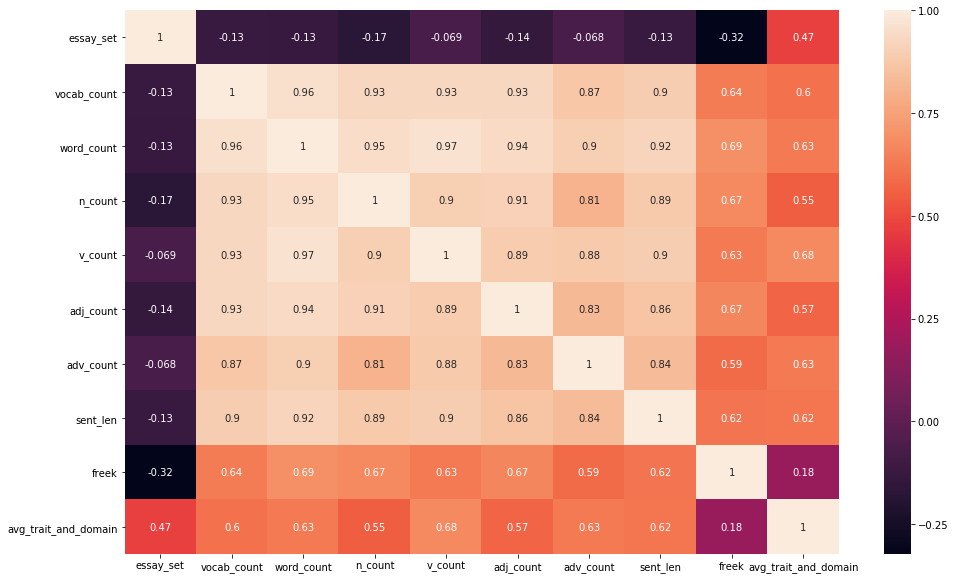

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


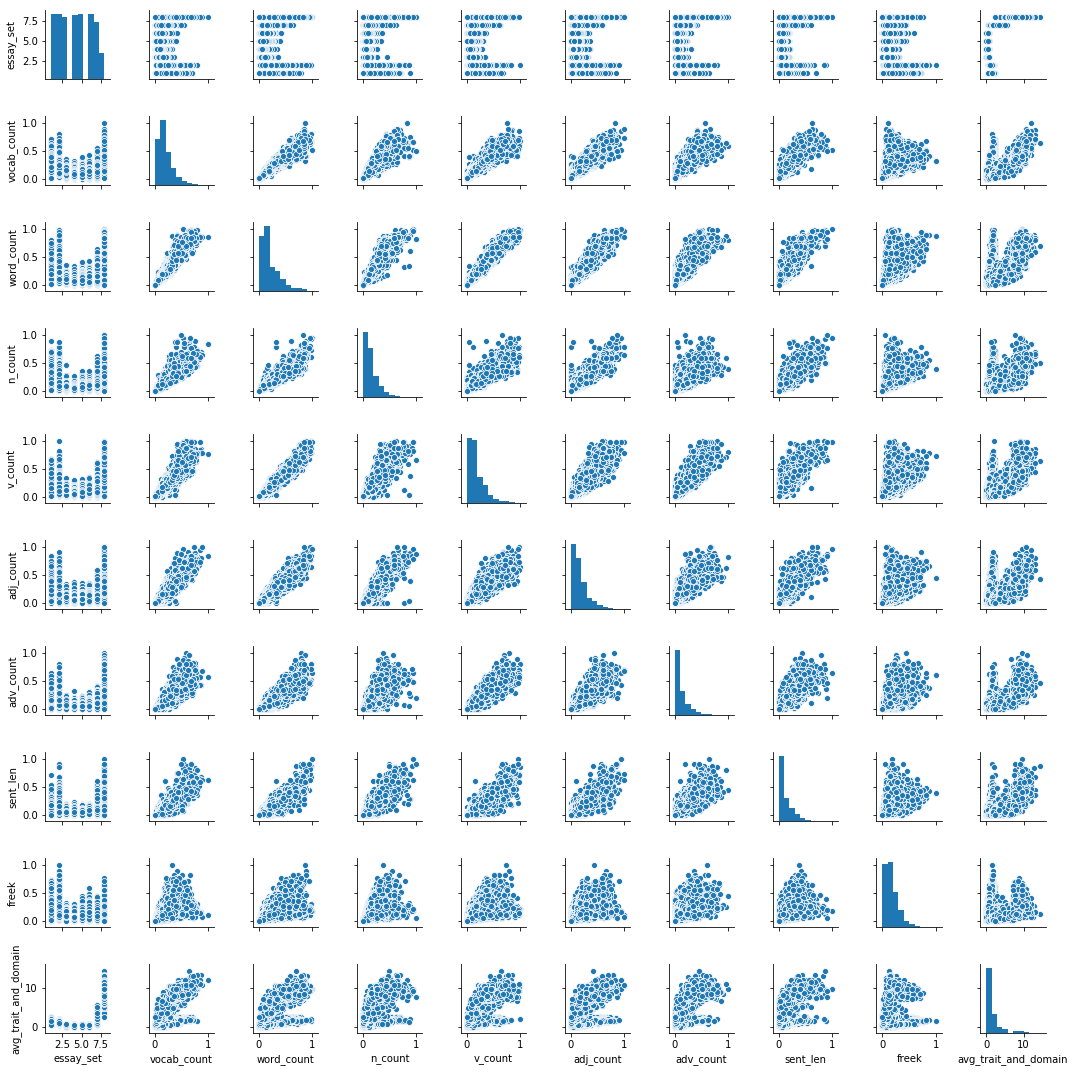

In [295]:
sns.pairplot(data, size=1.5);
plt.show()

In [364]:
from sklearn.metrics import mean_squared_error

In [369]:
mean_squared_error(label,pred)

0.1857474059611429